# IS5152 Project
## Beijing PM2.5 prediction

In [1]:
import os

# data manipulation
import pandas as pd
pd.set_option('display.max_columns', None)

import numpy as np

# visualiation
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

from utils import read_data, split_data

# Load Data

In [2]:
count, df = read_data()
df.head()

Loaded  data\PRSA_Data_Aotizhongxin_20130301-20170228.csv
Loaded  data\PRSA_Data_Changping_20130301-20170228.csv
Loaded  data\PRSA_Data_Dingling_20130301-20170228.csv
Loaded  data\PRSA_Data_Dongsi_20130301-20170228.csv
Loaded  data\PRSA_Data_Guanyuan_20130301-20170228.csv
Loaded  data\PRSA_Data_Gucheng_20130301-20170228.csv
Loaded  data\PRSA_Data_Huairou_20130301-20170228.csv
Loaded  data\PRSA_Data_Nongzhanguan_20130301-20170228.csv
Loaded  data\PRSA_Data_Shunyi_20130301-20170228.csv
Loaded  data\PRSA_Data_Tiantan_20130301-20170228.csv
Loaded  data\PRSA_Data_Wanliu_20130301-20170228.csv
Loaded  data\PRSA_Data_Wanshouxigong_20130301-20170228.csv
Applied normalization on  ['PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']
35064 rows per station, total 382168 rows


,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM,station,time_stamp,WD_E,WD_ENE,WD_ESE,WD_N,WD_NE,WD_NNE,WD_NNW,WD_NW,WD_S,WD_SE,WD_SSE,WD_SSW,WD_SW,WD_W,WD_WNW,WD_WSW
0,4.0,0.002006,0.007433,0.017361,0.020202,0.071710,0.312195,0.672185,0.264209,0.0,0.333333,Aotizhongxin,2013-03-01,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,8.0,0.006018,0.007433,0.017361,0.020202,0.071710,0.305691,0.675497,0.273425,0.0,0.356061,Aotizhongxin,2013-03-01,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,7.0,0.005015,0.009434,0.027778,0.020202,0.067974,0.305691,0.680464,0.273425,0.0,0.424242,Aotizhongxin,2013-03-01,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,6.0,0.004012,0.021441,0.031250,0.020202,0.067040,0.300813,0.697020,0.254992,0.0,0.234848,Aotizhongxin,2013-03-01,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,3.0,0.001003,0.023442,0.034722,0.020202,0.067040,0.291057,0.708609,0.253456,0.0,0.151515,Aotizhongxin,2013-03-01,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


# Split data:

In [3]:
## Shuffle df
import random

## Reindex from 0, original index can be used to split time series
if 'original_index' not in df.columns:
    df = df.reset_index()
    df = df.rename(columns={"index": "original_index"})

df.head()

def shuffle(df):
    index = list(df.index)
    random.shuffle(index)
    df = df.iloc[index]
    return df

df = shuffle(df)
df.head(10)

,original_index,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM,station,time_stamp,WD_E,WD_ENE,WD_ESE,WD_N,WD_NE,WD_NNE,WD_NNW,WD_NW,WD_S,WD_SE,WD_SSE,WD_SSW,WD_SW,WD_W,WD_WNW,WD_WSW
132716,148459,83.0,0.093280,0.133505,0.170139,0.080808,0.039023,0.310569,0.653974,0.388633,0.0,0.151515,Guanyuan,2014-02-05,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
319975,351959,8.0,0.013039,0.017439,0.114583,0.020202,0.053032,0.552846,0.423841,0.496160,0.0,0.143939,Wanliu,2013-04-24,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
345201,381272,11.0,0.033099,0.005432,0.159722,0.040404,0.011007,0.687805,0.432119,0.694316,0.0,0.136364,Wanliu,2016-08-28,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
376522,414794,9.0,0.007021,0.003431,0.086806,0.020202,0.056767,0.743089,0.337748,0.635945,0.0,0.166667,Wanshouxigong,2016-06-25,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
364873,402676,98.0,0.097292,0.045455,0.298611,0.242424,0.002602,0.242276,0.589404,0.357911,0.0,0.075758,Wanshouxigong,2015-02-06,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
225955,249063,52.0,0.019057,0.011435,0.343750,0.111111,0.068908,0.837398,0.200331,0.887865,0.0,0.053030,Nongzhanguan,2013-07-29,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
174368,193150,87.0,0.140421,0.061464,0.361111,0.171717,0.004469,0.404878,0.566225,0.330261,0.0,0.090909,Gucheng,2015-03-13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
144710,161083,37.0,0.035105,0.003431,0.170139,0.080808,0.033420,0.723577,0.332781,0.837174,0.0,0.098485,Guanyuan,2015-07-16,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
242660,266778,137.0,0.156469,0.003431,0.069444,0.121212,0.165099,0.804878,0.326159,0.887865,0.0,0.098485,Nongzhanguan,2015-08-06,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
218702,241130,3.0,0.029087,0.003431,0.003472,0.020202,0.001668,0.648780,0.152318,0.763441,0.0,0.083333,Huairou,2016-09-02,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [4]:
# split data
training_df, validation_df, test_df = split_data(df)
print("train: %d, val: %d, test: %d" % (len(training_df),len(validation_df),len(test_df)))

Data is split into train, validation and test dataset successfully!
train: 275161, val: 68791, test: 38216


# Simple Linear Regression:

In [5]:
# import torch
# import torch.nn as nn
# import numpy as np
# from torch.autograd import Variable
# test_local = training_df #test using CPU only, too slow to process 25k data

# target_col = test_local["PM2.5"].to_numpy(dtype=np.float32,copy=True).reshape(-1,1)
# data_col = test_local.drop(columns=["PM2.5"]).to_numpy(dtype=np.float32,copy=True)

# val_y = validation_df["PM2.5"].to_numpy(dtype=np.float32,copy=True).reshape(-1,1)
# val_x = validation_df.drop(columns=["PM2.5"]).to_numpy(dtype=np.float32,copy=True)


# print("Training Data",data_col.shape,target_col.shape)
# print("Validation Data",val_x.shape,val_y.shape)


# model = torch.nn.Sequential(
#     torch.nn.Linear(8, 1),
# )

# enable_cuda = True

# if torch.cuda.is_available() and enable_cuda:
#     print("Cuda is available!")
#     model.cuda()
# else:
#     print("Cuda not available, using CPU")

# loss_fn = nn.MSELoss()
# # loss_fn = nn.L1Loss()
# # loss_fn = nn.SmoothL1Loss()
# optimizer = torch.optim.Adam(model.parameters(), lr=2e-05)
# # optimizer = torch.optim.SGD(model.parameters(),lr=1e-05)

# train_loss_history = []
# val_loss_history = []

# for epoch in range(300000):
    
#     ## Training
# #     model.train(True)
#     if torch.cuda.is_available() and enable_cuda:
#         y = Variable(torch.from_numpy(target_col).cuda())
#         x = Variable(torch.from_numpy(data_col).cuda())
#     else:
#         y = Variable(torch.from_numpy(target_col))
#         x = Variable(torch.from_numpy(data_col))
#     y_pred = model(x)
    
#     training_loss = loss_fn(y_pred, y)
    
#     optimizer.zero_grad()
#     training_loss.backward()
#     optimizer.step()
    
#      ## Validation
# #     model.train(False)
#     if torch.cuda.is_available() and enable_cuda:
#         y = Variable(torch.from_numpy(val_y).cuda())
#         x = Variable(torch.from_numpy(val_x).cuda())
#     else:
#         y = Variable(torch.from_numpy(val_y))
#         x = Variable(torch.from_numpy(val_x))
#     y_pred = model(x)
#     val_loss = loss_fn(y_pred,y)
#     train_loss_history.append(training_loss.item())
#     val_loss_history.append(val_loss.item())

    
#     if epoch % 1000 == 0:
#         print('Epoch {}, training loss {}, val loss {}'.format(epoch,training_loss.item(),val_loss.item()))
       
        

# import matplotlib.pyplot as plt

# %matplotlib inline

# # Plot training & validation accuracy values
# plt.plot(train_loss_history)
# plt.plot(val_loss_history)
# plt.title('Model Loss')
# plt.ylabel('Loss')
# plt.xlabel('Epoch')
# plt.legend(['Train', 'Validation'], loc='upper left')
# plt.show()

In [6]:
# ## Test
# def test(test_y, test_x):
#     if torch.cuda.is_available() and enable_cuda:
#         y = Variable(torch.from_numpy(test_y).cuda())
#         x = Variable(torch.from_numpy(test_x).cuda())
#     else:
#         y = Variable(torch.from_numpy(test_y))
#         x = Variable(torch.from_numpy(test_x))
#     y_pred = model(x)
#     test_loss = loss_fn(y_pred,y)
#     return y_pred, test_loss.item()

# test_y = test_df["PM2.5"].to_numpy(dtype=np.float32,copy=True).reshape(-1,1)
# test_x = test_df.drop(columns=["PM2.5"]).to_numpy(dtype=np.float32,copy=True)
# y_pred, test_loss = test(test_y, test_x)

# result = test_df.copy()
# result['Predict_PM2.5'] = y_pred.type(torch.FloatTensor).cpu().detach().numpy().astype(float)

# print(result.iloc[1])
# print('Test loss is {}'.format(test_loss))

In [7]:
# model.state_dict()

In [8]:
# df.head()

# Time Series:

In [5]:
time_df = df.copy()
time_df = time_df[['PM2.5','time_stamp','station']].groupby(["time_stamp"]).median().reset_index().sort_values(by='time_stamp',ascending=True)
time_df.head()
#plt.subplots(figsize=(15,5))
#sb.pointplot(x='time_stamp', y='PM2.5', data=time_df)

,time_stamp,PM2.5
0,2013-03-01,7.0
1,2013-03-02,26.0
2,2013-03-03,84.5
3,2013-03-04,15.0
4,2013-03-05,128.0


In [10]:
# Import Prophet
import pandas as pd
from fbprophet import Prophet

# Change the column names according to Prophet's guidelines
time_df.columns = ['ds', 'y']
print("Input Data is: \n", time_df.tail())

# Split into a train/test set
training_df, validation_df, test_df = split_data(time_df)
train_df = training_df.append(validation_df, ignore_index=True)
prediction_size = len(test_df)
print("train: %d, test: %d" % (len(train_df),len(test_df)))

# Initialize and train a model
m = Prophet()
m.fit(train_df)

# Make predictions
future = m.make_future_dataframe(periods=prediction_size)

forecast = m.predict(future)
print("Forcast Data is: \n", forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Input Data is: 
              ds     y
1456 2017-02-24  18.0
1457 2017-02-25  10.0
1458 2017-02-26  24.0
1459 2017-02-27  62.0
1460 2017-02-28  12.0
Data is split into train, validation and test dataset successfully!
train: 1315, test: 146
Forcast Data is: 
              ds       yhat  yhat_lower  yhat_upper
1456 2017-02-24  93.017776    9.133258  182.144453
1457 2017-02-25  94.338447    9.694636  176.180002
1458 2017-02-26  88.601262   -1.881400  171.444554
1459 2017-02-27  82.623233    1.825541  160.318819
1460 2017-02-28  85.414166    0.675187  167.823367


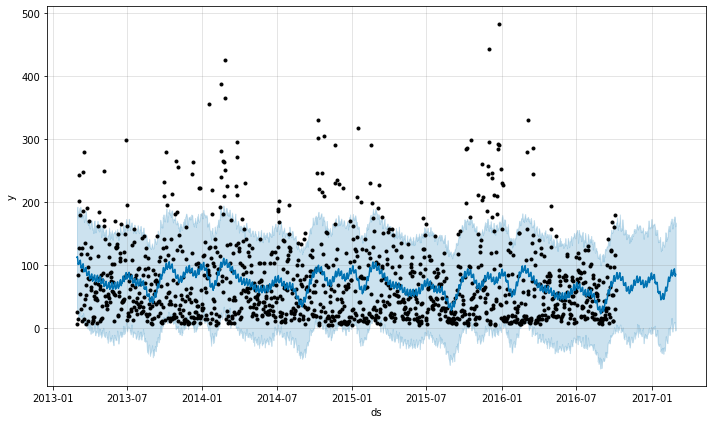

In [7]:
# Plot forecast
fig1 = m.plot(forecast)

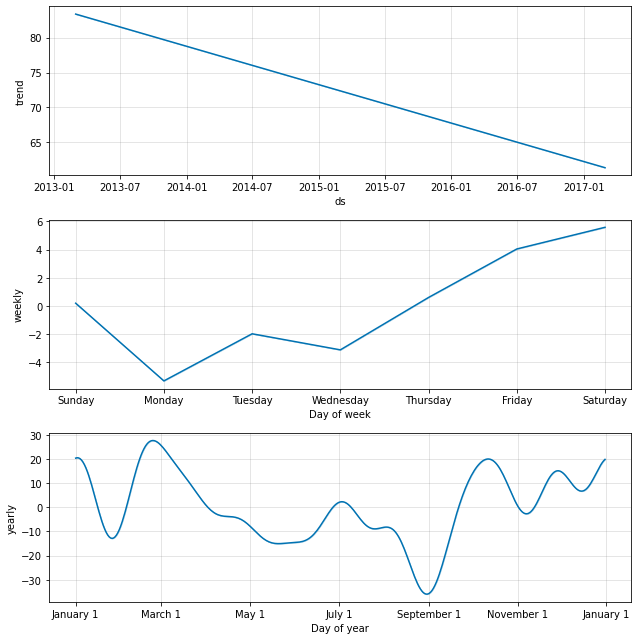

In [8]:
# Plot forecast's components
fig2 = m.plot_components(forecast)

Comparison between actual and forecast: 
                  yhat  yhat_lower  yhat_upper      y
ds                                                  
2016-10-06  82.506128    6.170112  167.506483   71.0
2016-10-07  86.460021   -3.867008  167.057142   40.0
2016-10-08  88.414422    4.952391  175.859100    9.0
2016-10-09  83.336653    0.485890  168.734524   31.0
2016-10-10  78.022456   -6.612307  156.158553   79.0
2016-10-11  81.460197    2.644242  163.585135  124.0
2016-10-12  80.292389   -2.485705  162.358935   76.0
2016-10-13  83.866853   -0.053668  166.059134  139.5
2016-10-14  87.035473    3.368339  169.390095  235.0
2016-10-15  88.175090    5.189521  180.524448  182.0
2016-10-16  82.256769    6.030468  161.067479  119.0
2016-10-17  76.082063   -6.393408  154.409040   52.0
2016-10-18  78.647209   -0.059976  159.020048  117.0
2016-10-19  76.604558   -5.186511  155.505704  219.0
2016-10-20  79.313578   -3.954969  163.005487   47.0
2016-10-21  81.639361   -4.333256  172.840955   43.0
2016

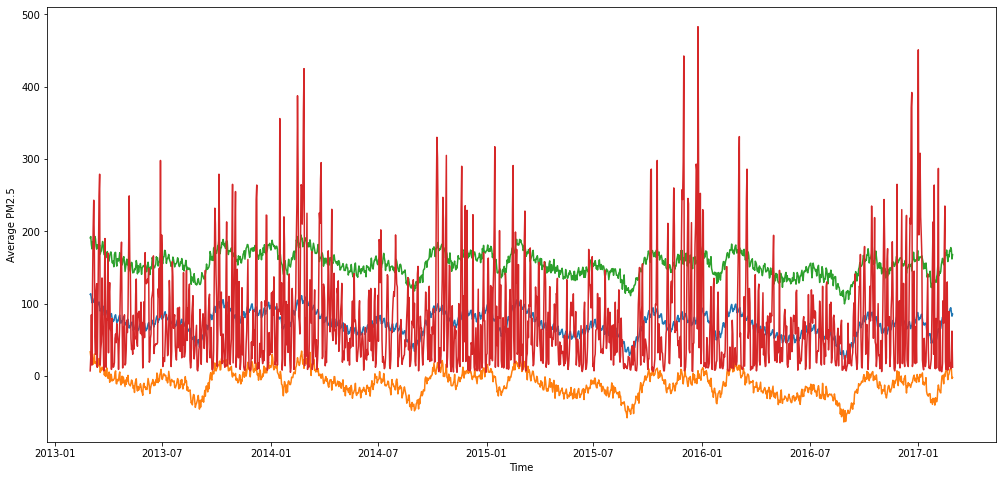

In [9]:
# Evaluate the model by mean absolute percentage error (MAPE) and mean absolute error (MAE)
def make_comparison_dataframe(historical, forecast):
    return forecast.set_index('ds')[['yhat', 'yhat_lower', 'yhat_upper']].join(historical.set_index('ds'))

cmp_df = make_comparison_dataframe(time_df, forecast)
print("Comparison between actual and forecast: \n", cmp_df[-prediction_size:])

def calculate_forecast_errors(df, prediction_size):
    
    df = df.copy()
    
    df['e'] = df['y'] - df['yhat']
    df['p'] = 100 * df['e'] / df['y']
    
    predicted_part = df[-prediction_size:]
    
    error_mean = lambda error_name: np.mean(np.abs(predicted_part[error_name]))
    
    return {'MAPE': error_mean('p'), 'MAE': error_mean('e')}

for err_name, err_value in calculate_forecast_errors(cmp_df, prediction_size).items():
    print(err_name, err_value)

# Plot forecast with upper and lower bounds
plt.figure(figsize=(17, 8))
plt.plot(cmp_df['yhat'])
plt.plot(cmp_df['yhat_lower'])
plt.plot(cmp_df['yhat_upper'])
plt.plot(cmp_df['y'])
plt.xlabel('Time')
plt.ylabel('Average PM2.5')
plt.grid(False)
plt.show()